# Análise Exploratória de Dados (EDA) 

### Importanto o dataset e mostrando algumas informações gerais

In [14]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np

In [1]:
df = pd.read_csv('dataset/fault/feature_time_48k_2048_load_1.csv')
df

max      min      mean        sd       rms  skewness  kurtosis  \
0     0.35986 -0.41890  0.017840  0.122746  0.124006 -0.118571 -0.042219   
1     0.46772 -0.36111  0.022255  0.132488  0.134312  0.174699 -0.081548   
2     0.46855 -0.43809  0.020470  0.149651  0.151008  0.040339 -0.274069   
3     0.58475 -0.54303  0.020960  0.157067  0.158422 -0.023266  0.134692   
4     0.44685 -0.57891  0.022167  0.138189  0.139922 -0.081534  0.402783   
...       ...      ...       ...       ...       ...       ...       ...   
2295  0.21425 -0.19839  0.010769  0.064100  0.064983 -0.212497 -0.119312   
2296  0.21967 -0.20882  0.013136  0.068654  0.069883 -0.061308 -0.295122   
2297  0.20799 -0.21613  0.012571  0.067128  0.068279 -0.154754 -0.071405   
2298  0.21425 -0.22405  0.012608  0.066813  0.067977 -0.326966  0.023662   
2299  0.19610 -0.24721  0.012209  0.063243  0.064396 -0.351762  0.226294   

         crest      form       fault  
0     2.901946  6.950855  Ball_007_1  
1     3.482334  6.035202  Ball_007_1  
2     3.102819  7.376926  Ball_007_1  
3     3.691097  7.558387  Ball_007_1  
4     3.193561  6.312085  Ball_007_1  
...        ...       ...         ...  
2295  3.297037  6.034174    Normal_1  
2296  3.143410  5.319958    Normal_1  
2297  3.046161  5.431299    Normal_1  
2298  3.151821  5.391672    Normal_1  
2299  3.045244  5.274392    Normal_1  

[2300 rows x 10 columns]

**Descrição:** esse dataset contém features obtidas a partir de medições de vibração no domínio do tempo de motores. A coluna 'fault' mostra a situação do motor, que pode ser saudável, ou algum tipo de falha. Todas as outras colunas são features extraídas da amostra no domínio do tempo. A seguir, é melhor explicado cada uma das features:

- **max**: O valor máximo da amplitude da vibração registrada ao longo do tempo;
- **min**: O valor mínimo da amplitude da vibração registrada ao longo do tempo;
- **mean**: A média aritmética de todos os valores de amplitude da vibração;
- **sd**: O desvio padrão da média;
- **rms**: Root Mean Square. A raiz quadrada da média dos quadrados dos valores de amplitude da vibração;
- **skewness**: Mede a assimetria. Valores positivos indicam uma cauda longa à direita, enquanto valores negativos indicam uma cauda longa à esquerda;
- **kurtosis**: Mede a pontualidade da distribuição dos valores de vibração. Valores altos indicam uma distribuição com picos altos (caudas pesadas), enquanto valores baixos indicam uma distribuição mais achatada;
- **crest**: Fator de crista ou fator de pico. A razão entre o valor máximo da amplitude e o RMS. Indica a relação entre o pico máximo e a média quadrática dos valores de vibração. É interessante para identificar picos anômalos.
- **form**: Fator de forma. É a razão entre o RMS e o valor médio absoluto. É útil para avaliar a forma geral da onda de vibração.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2300 entries, 0 to 2299
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   max       2300 non-null   float64
 1   min       2300 non-null   float64
 2   mean      2300 non-null   float64
 3   sd        2300 non-null   float64
 4   rms       2300 non-null   float64
 5   skewness  2300 non-null   float64
 6   kurtosis  2300 non-null   float64
 7   crest     2300 non-null   float64
 8   form      2300 non-null   float64
 9   fault     2300 non-null   object 
dtypes: float64(9), object(1)
memory usage: 179.8+ KB


Podemos ver que todas as features estão no formato correto (float). Vamos ver mais de perto os valores de 'fault'.

In [3]:
df['fault'].value_counts()

fault
Ball_007_1    230
Ball_014_1    230
Ball_021_1    230
IR_007_1      230
IR_014_1      230
IR_021_1      230
OR_007_6_1    230
OR_014_6_1    230
OR_021_6_1    230
Normal_1      230
Name: count, dtype: int64

Concluímos que não há problemas de valores faltantes ou nulos no dataset. Ainda, o balanceamento dos valores de falha está perfeito, com os valores de falha distribuídos igualmente.

Além disso, podemos ver que há três grupos de falha: falhas do tipo "Ball", "IR" e "OR".

In [4]:
df.describe()

max          min         mean           sd          rms  \
count  2300.000000  2300.000000  2300.000000  2300.000000  2300.000000   
mean      1.575079    -1.550994     0.015711     0.341601     0.342289   
std       1.578422     1.602706     0.006469     0.305279     0.304813   
min       0.157300    -6.292600     0.003246     0.059140     0.061067   
25%       0.456398    -2.174975     0.011236     0.135506     0.136374   
50%       0.794510    -0.733700     0.013730     0.188551     0.190662   
75%       2.278425    -0.426987     0.018638     0.555589     0.555671   
max       6.825900    -0.160220     0.038386     1.256577     1.256311   

          skewness     kurtosis        crest         form  
count  2300.000000  2300.000000  2300.000000  2300.000000  
mean     -0.042251     2.664444     4.173130    26.544769  
std       0.180774     4.411096     1.148349    29.209702  
min      -1.089928    -0.803795     2.428511     3.484429  
25%      -0.103426    -0.015164     3.260382     7.413359  
50%      -0.002466     0.816970     3.921650    13.122811  
75%       0.061093     3.902286     4.815876    39.911894  
max       1.059512    30.385326     8.821577   313.742612

Percebe-se que todas as features estão em uma ordem de grandeza semelhante. Portanto, um processo de normalização dos dados mais prejudicaria a interpretabilidade e adicionaria um processo a mais nos cálculos do que efetivamente ajudaria.

## Visualizações

### Distribuições

In [7]:
target = 'fault'
features = [col for col in df.columns if col != target]

for feature in features:
    fig = px.histogram(df[feature],title=f'Distribuição de {feature}')
    fig.show()

No geral, nada muito estranho foi visto nas distribuições. Possivelmente alguns outliers em algumas delas, porém pode ser precipitado tratá-los, uma vez que (i) há a possibilidade de que eles indiquem uma falha e (ii) o dataset não possui um número tão grande de amostras.

### Matriz de correlações

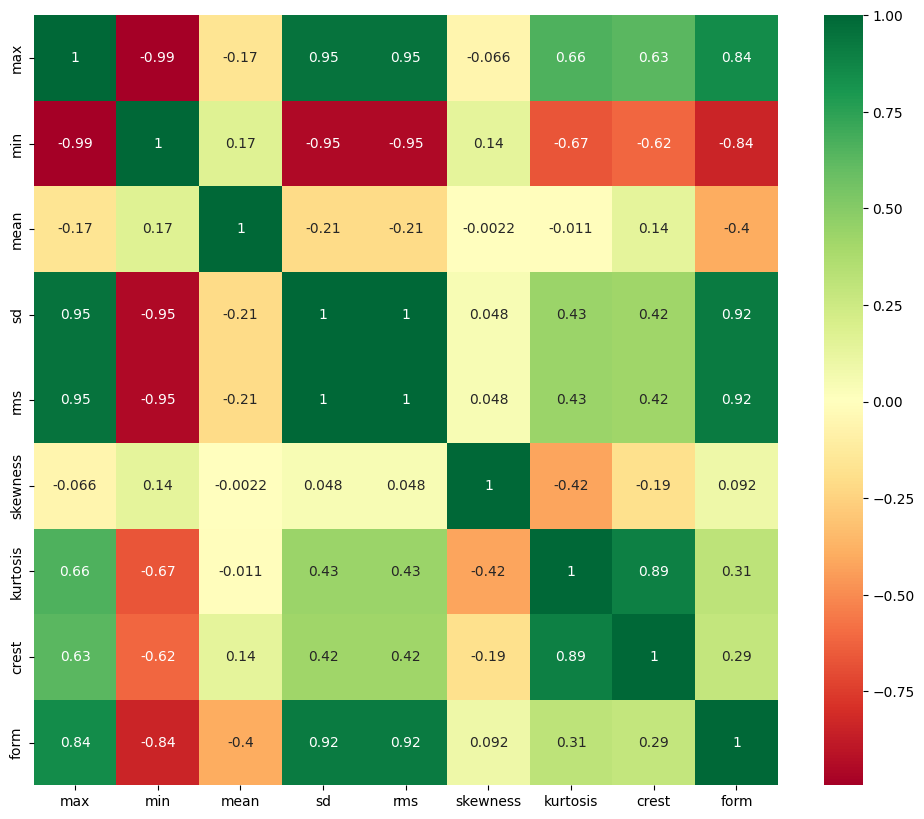

In [11]:
rcParams['figure.figsize'] = 12, 10
sns.heatmap(df[features].corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
plt.show()

Percebe-se que há correlação forte entre as seguintes features:

- rms, sd, min, max, e form;

Particularmente, a relação é especialmente forte para:

- min e max;
- rms e sd;

É interessante ser cauteloso antes de dropar as features, pois, no nosso caso, não há tantas features assim, fazendo com que não seja necessário remover features.

Como a fórmula para cálculo de "rms" e "sd" é muito parecida, de fato, podemos dropar "sd" , já que é a menos interpretável do ponto de vista de análise de vibrações;

Além disso, min e max também trazem aproximadamente a mesma informação, permitindo-nos dropar min, por exemplo.

Já as restantes (max, rms e form) possuem todas significados bem diferentes, ou seja, talvez elas possam interagir de maneira não linear para diagnosticar a falha.

In [12]:
# Dropando sd e min
df = df.drop(['sd','min'],axis=1)
df

max      mean       rms  skewness  kurtosis     crest      form  \
0     0.35986  0.017840  0.124006 -0.118571 -0.042219  2.901946  6.950855   
1     0.46772  0.022255  0.134312  0.174699 -0.081548  3.482334  6.035202   
2     0.46855  0.020470  0.151008  0.040339 -0.274069  3.102819  7.376926   
3     0.58475  0.020960  0.158422 -0.023266  0.134692  3.691097  7.558387   
4     0.44685  0.022167  0.139922 -0.081534  0.402783  3.193561  6.312085   
...       ...       ...       ...       ...       ...       ...       ...   
2295  0.21425  0.010769  0.064983 -0.212497 -0.119312  3.297037  6.034174   
2296  0.21967  0.013136  0.069883 -0.061308 -0.295122  3.143410  5.319958   
2297  0.20799  0.012571  0.068279 -0.154754 -0.071405  3.046161  5.431299   
2298  0.21425  0.012608  0.067977 -0.326966  0.023662  3.151821  5.391672   
2299  0.19610  0.012209  0.064396 -0.351762  0.226294  3.045244  5.274392   

           fault  
0     Ball_007_1  
1     Ball_007_1  
2     Ball_007_1  
3     Ball_007_1  
4     Ball_007_1  
...          ...  
2295    Normal_1  
2296    Normal_1  
2297    Normal_1  
2298    Normal_1  
2299    Normal_1  

[2300 rows x 8 columns]

### Interações das features com as falhas

Dividiremos essas análises em quatro partes:

1. Features -> tipo de falha ("Ball","IR","OR");
2. Features -> falhas Ball ("Ball_007_1","Ball_014_1","Ball_021_1");
3. Features -> falhas IR ("IR_007_1","IR_014_1","IR_021_1");
4. Features -> falhas OR ("OR_007_6_1","OR_014_6_1","OR_021_6_1");

### 1. Features -> tipo de falha ("Ball","IR","OR");

In [17]:
# Construindo df_type

df_type = df.copy()

df_type['fault'] = np.where(
    df_type['fault'].str.contains("Ball"),
    "Ball",
    df_type['fault']
)

df_type['fault'] = np.where(
    df_type['fault'].str.contains("IR"),
    "IR",
    df_type['fault']
)

df_type['fault'] = np.where(
    df_type['fault'].str.contains("OR"),
    "OR",
    df_type['fault']
)

df_type['fault'].value_counts()

fault
Ball        690
IR          690
OR          690
Normal_1    230
Name: count, dtype: int64

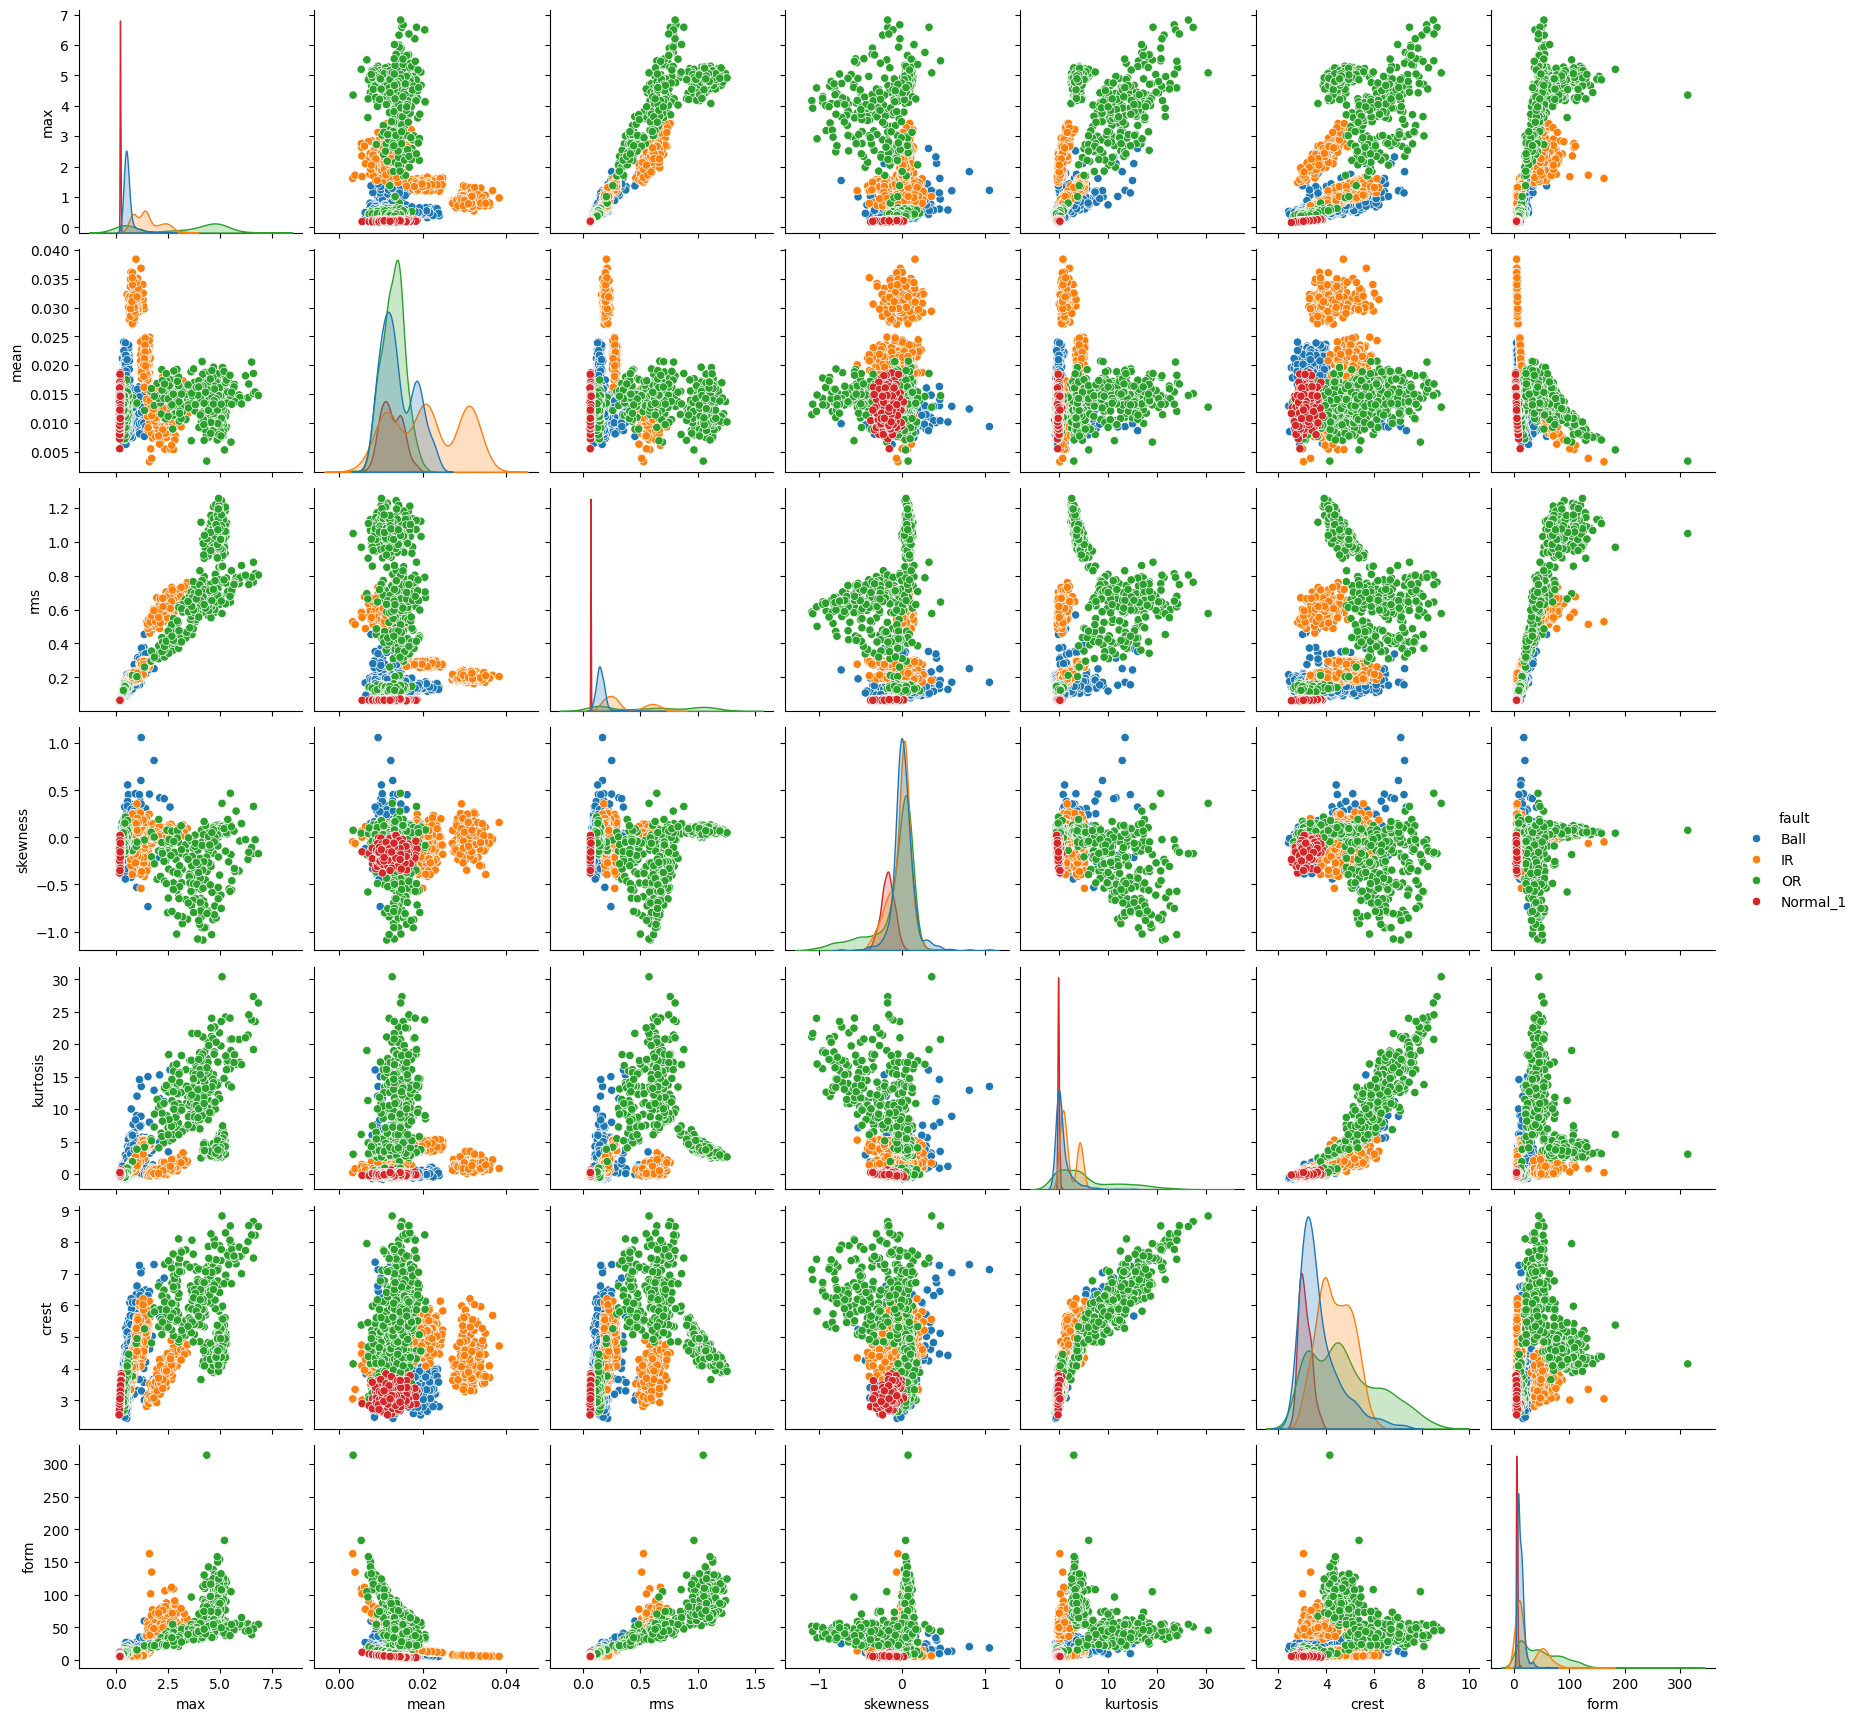

In [24]:
rcParams['figure.figsize'] = 6, 5
sns.pairplot(df_type,hue='fault')

Podemos ver que alguns pares de gráficos conseguem separar razoavelmente bem os tipos de falha, como:

- mean e crest;
- rms e max;
- mean e skewness.

### 2. Features -> falhas Ball ("Ball_007_1","Ball_014_1","Ball_021_1");

In [22]:
# Construindo df_ball

df_ball = df.copy()

df_ball = df_ball.loc[(df_ball['fault'].str.contains('Ball')) | (df_ball['fault'].str.contains('Normal')) ].reset_index(drop=True)

df_ball['fault'].value_counts()

fault
Ball_007_1    230
Ball_014_1    230
Ball_021_1    230
Normal_1      230
Name: count, dtype: int64

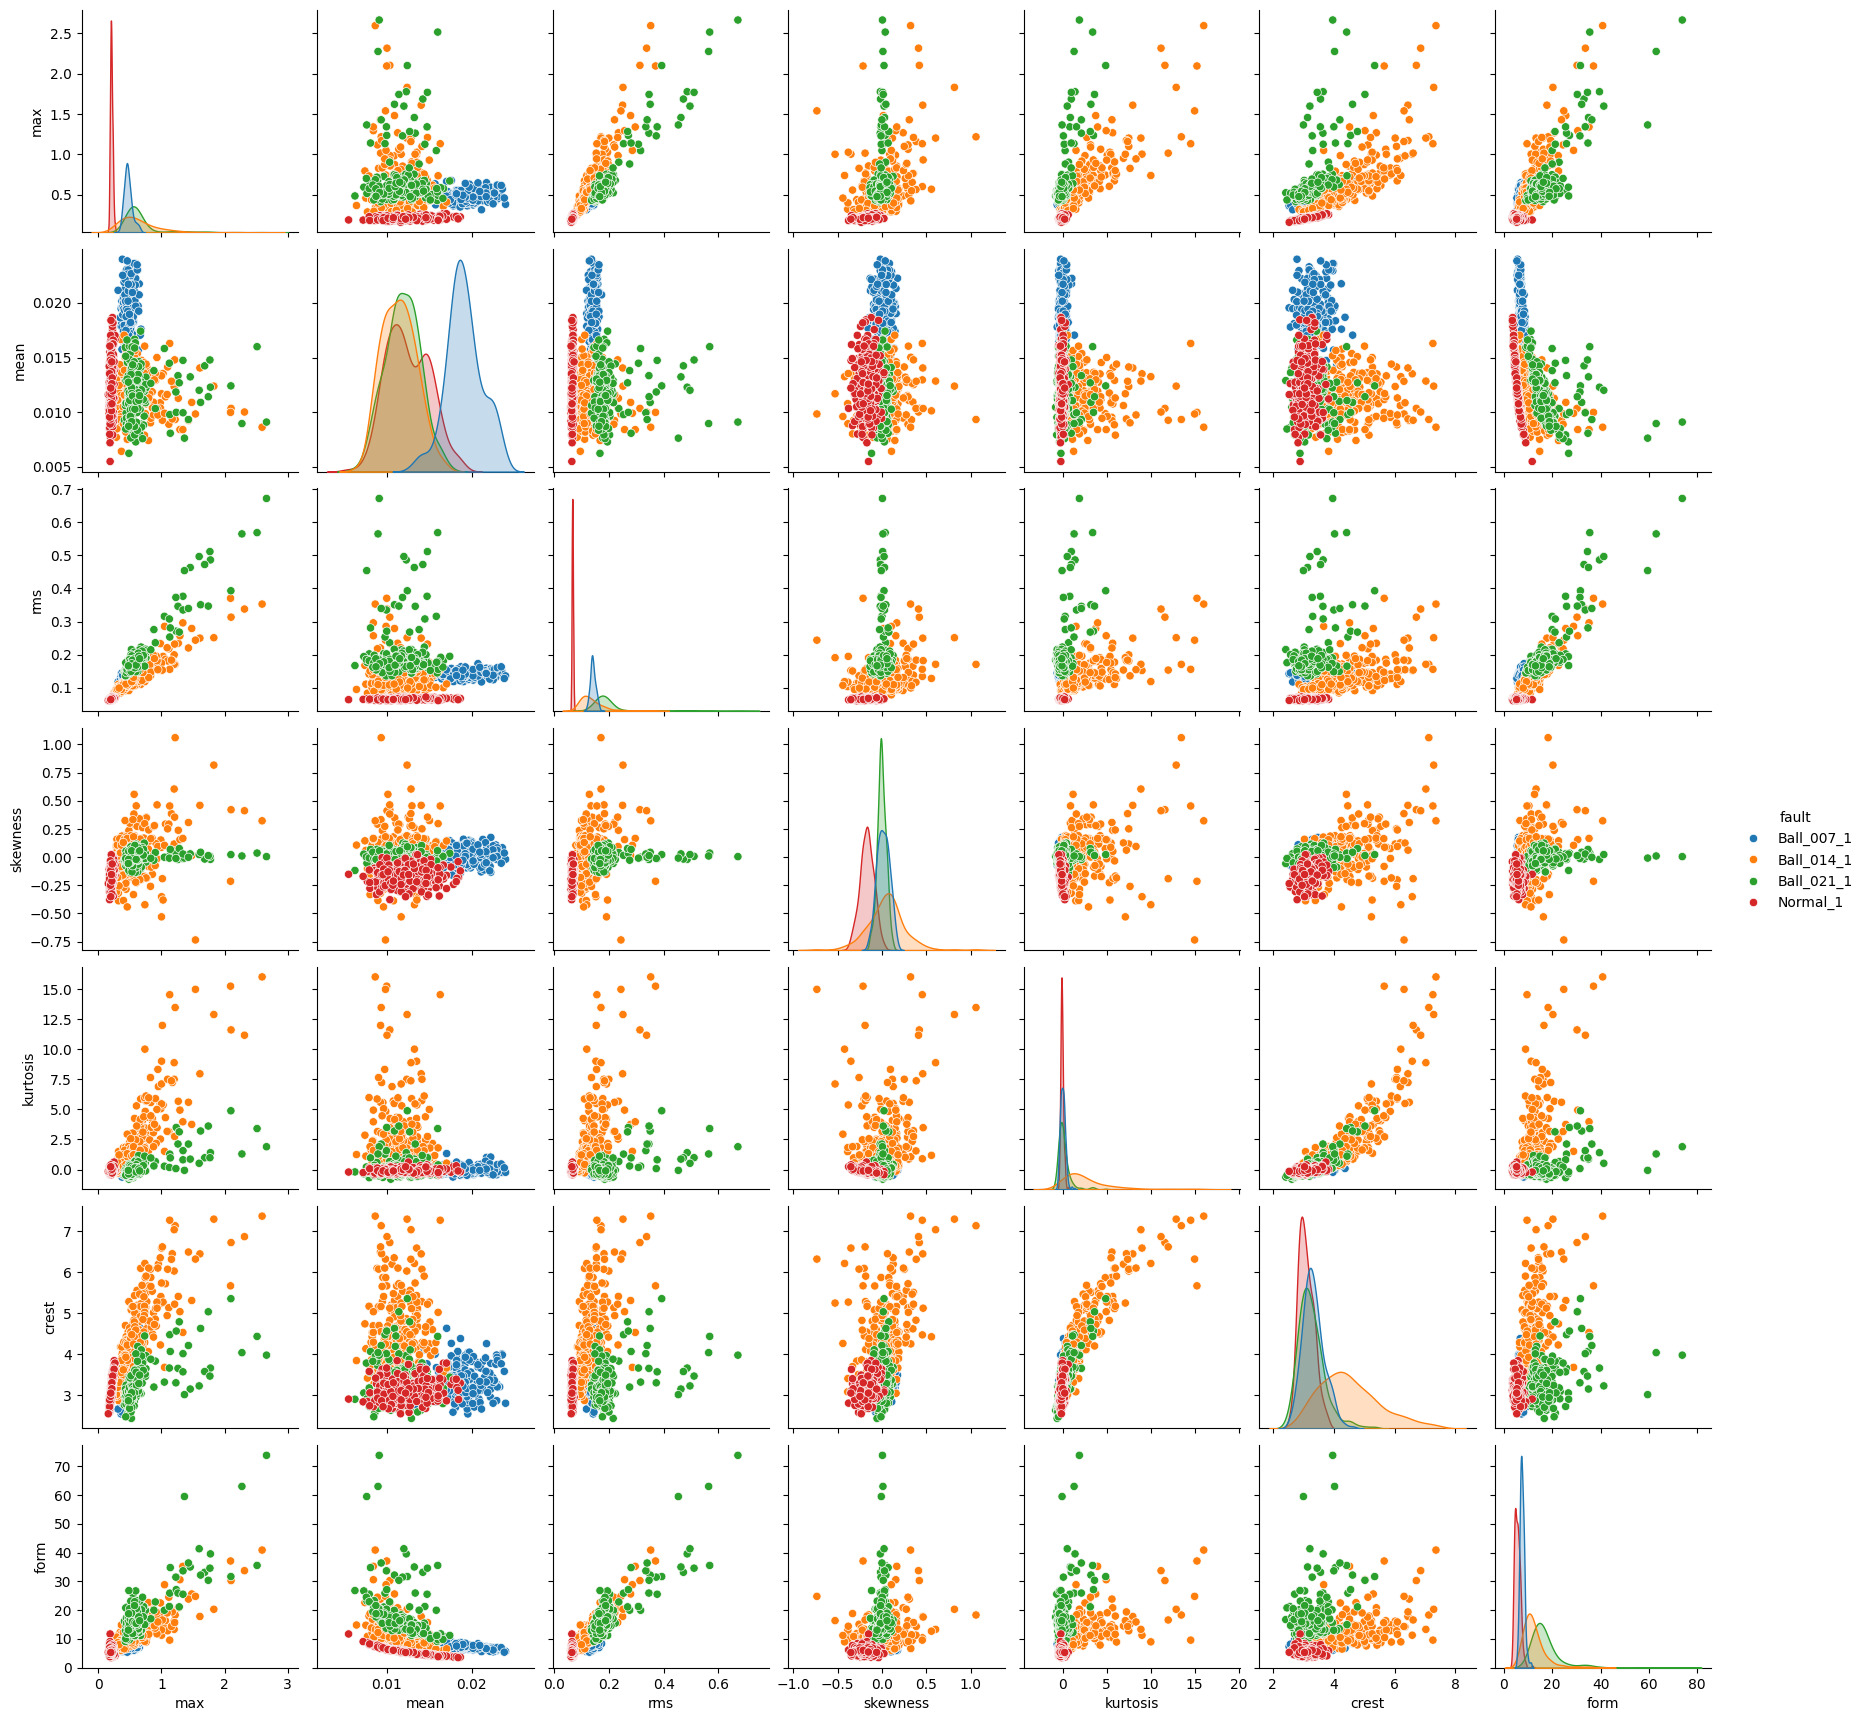

In [25]:
rcParams['figure.figsize'] = 6, 5
sns.pairplot(df_ball,hue='fault')

Também é possível notar algumas curvas com boa separação:

- mean e crest;
- mean e form;
- rms e kurtosis.

### 3. Features -> falhas IR ("IR_007_1","IR_014_1","IR_021_1");

In [26]:
# Construindo df_IR

df_IR = df.copy()

df_IR = df_IR.loc[(df_IR['fault'].str.contains('IR')) | (df_IR['fault'].str.contains('Normal')) ].reset_index(drop=True)

df_IR['fault'].value_counts()

fault
IR_007_1    230
IR_014_1    230
IR_021_1    230
Normal_1    230
Name: count, dtype: int64

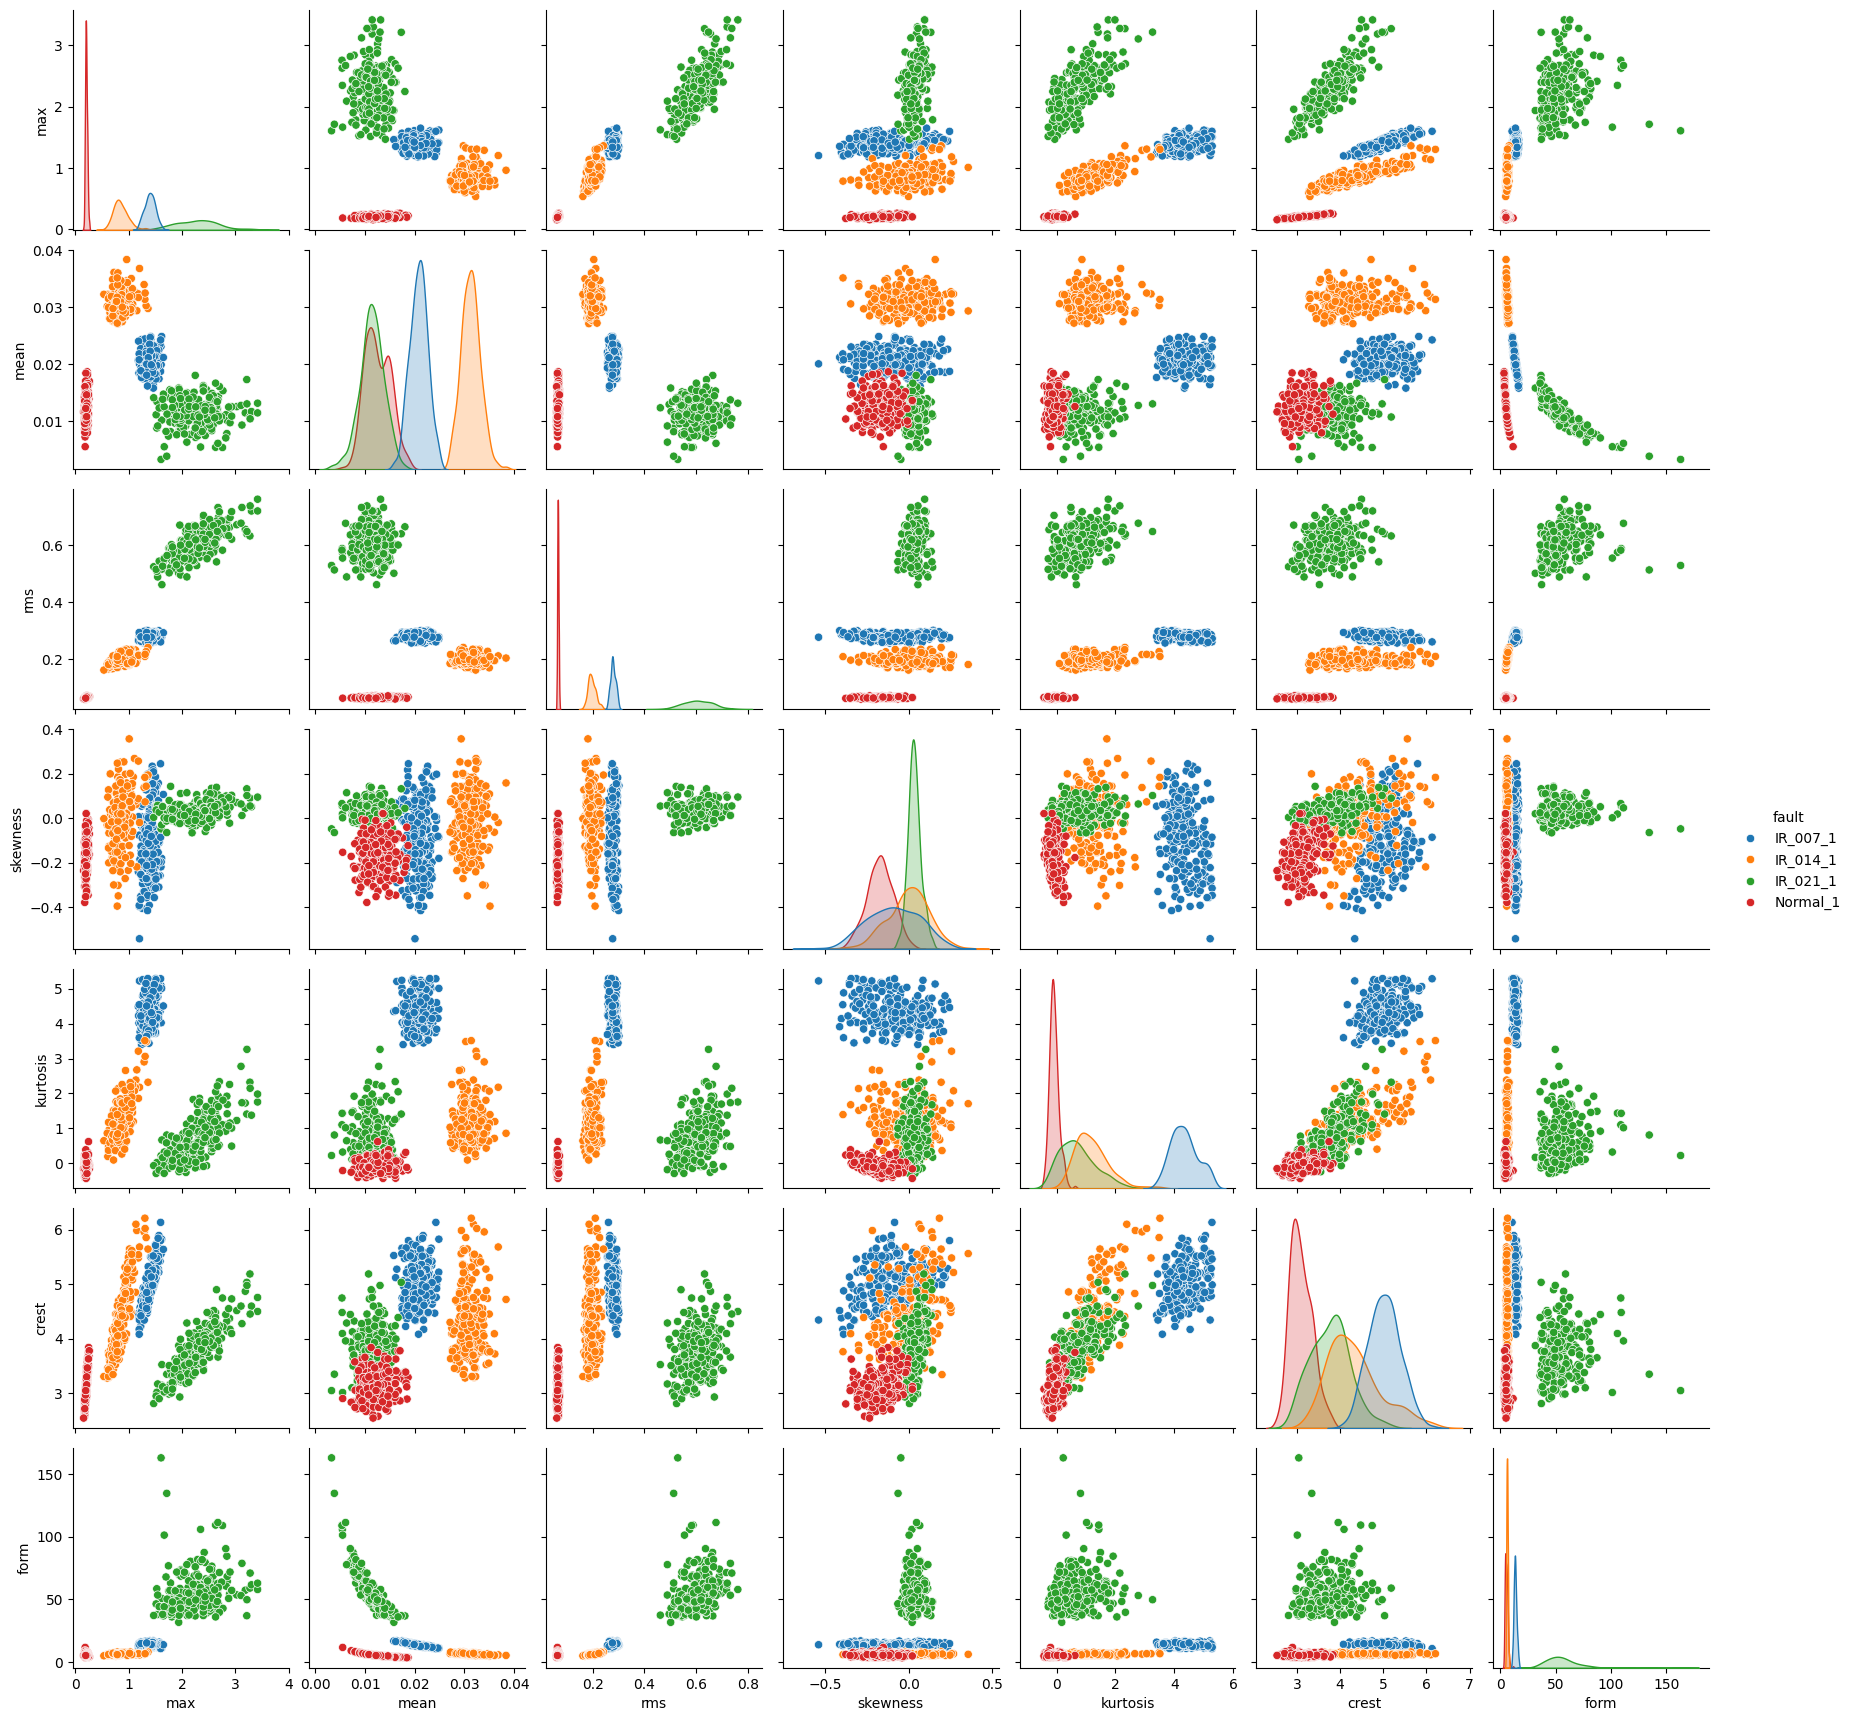

In [27]:
rcParams['figure.figsize'] = 6, 5
sns.pairplot(df_IR,hue='fault')

Também é possível notar algumas curvas com boa separação:

- max e form;
- rms e crest;
- mean e kurtosis.

### 4. Features -> falhas OR ("OR_007_6_1","OR_014_6_1","OR_021_6_1");;

In [28]:
# Construindo df_OR

df_OR = df.copy()

df_OR = df_OR.loc[(df_OR['fault'].str.contains('OR')) | (df_OR['fault'].str.contains('Normal')) ].reset_index(drop=True)

df_OR['fault'].value_counts()

fault
OR_007_6_1    230
OR_014_6_1    230
OR_021_6_1    230
Normal_1      230
Name: count, dtype: int64

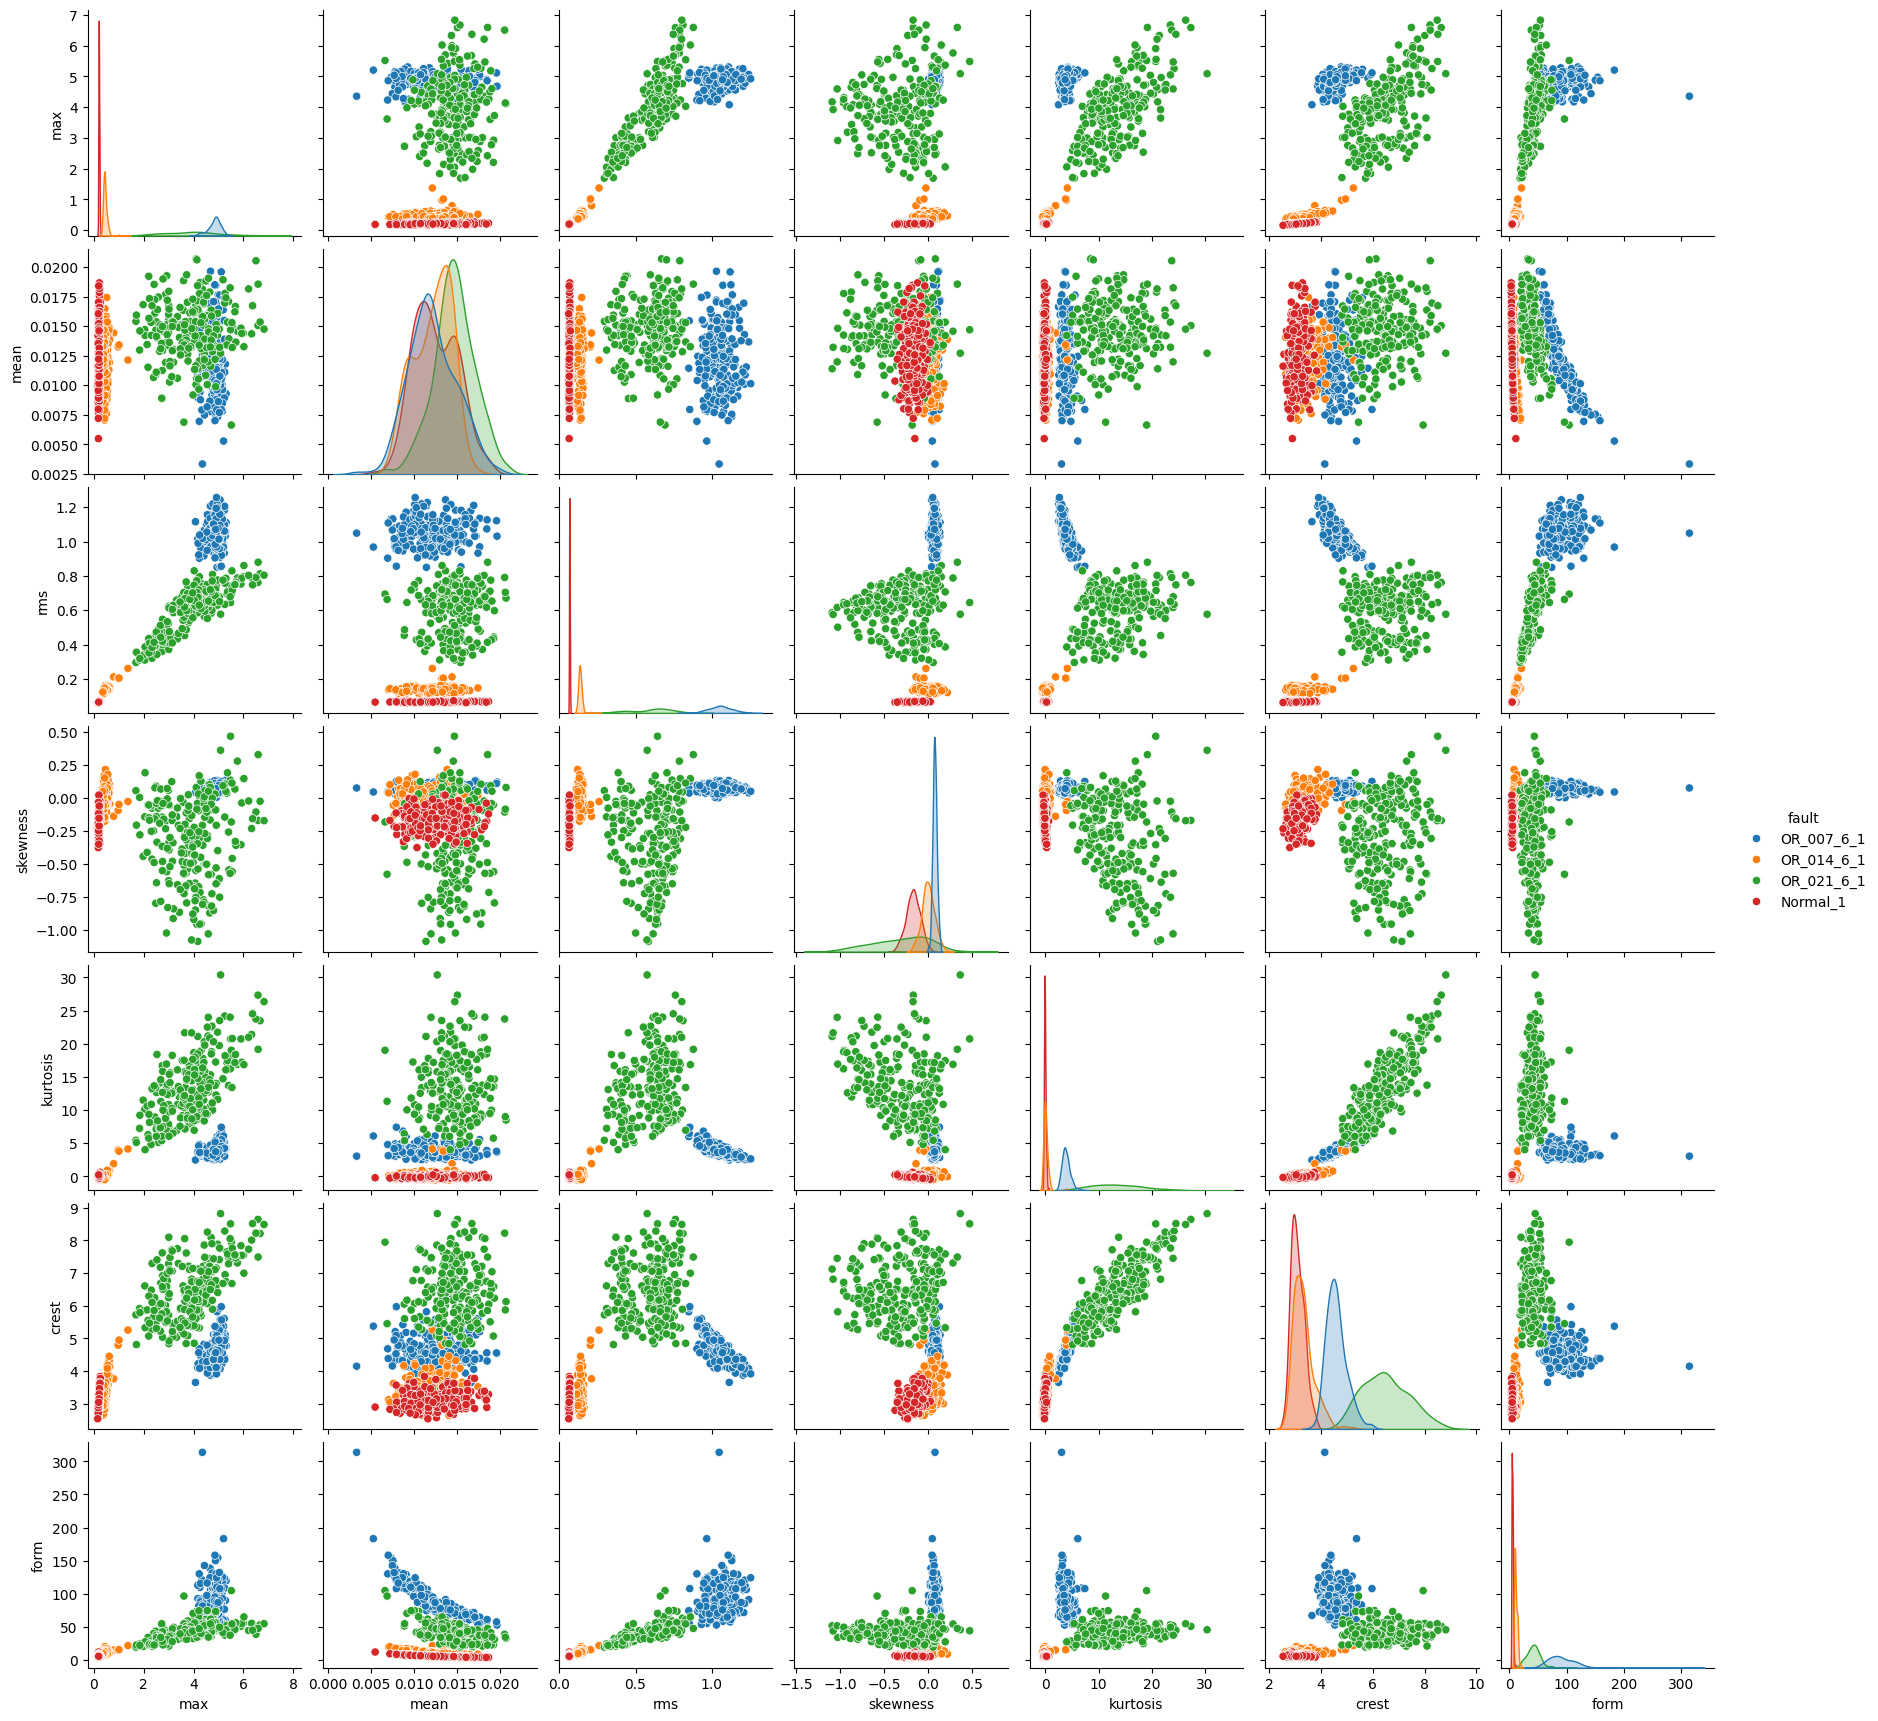

In [30]:
rcParams['figure.figsize'] = 6, 5
sns.pairplot(df_OR,hue='fault')

O valor de rms, sozinho, já parece fornecer uma boa separação, mas outros grupos como (i) mean e crest e (ii) max e kurtosis também podem ajudar.

<br>

## Conclusões gerais:

- Os dados não necessitam de limpeza, apenas a remoção de duas features redundantes: min e sd;
- Foram identificadas interações interessantes entre features e target, tornando a solução de classificação bem promissora;
- Como algumas interações parecem ser não lineares, possivelmente o ideal será utilizar modelos um pouco mais complexos, como Random Forest, Boosting ou Redes Neurais.